In [1]:
#Import general python packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
import random
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)


In [2]:
#Read ('SmartWay Vehicle List for MY 2022.xlsx') file
df=pd.read_excel('SmartWay Vehicle List for MY 2022.xlsx', "all_alpha_22")
df.head()

,Model,Displ,Cyl,Trans,Drive,Fuel,Cert Region,Stnd,Stnd Description,Underhood ID,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay
0,AUDI A3,2.0,4.0,AMS-7,2WD,Gasoline,CA,L3SULEV30,California LEV-III SULEV30,NVGAV02.0A3B,small car,7,29,38,32,7,Yes
1,AUDI A3,2.0,4.0,AMS-7,2WD,Gasoline,FA,T3B30,Federal Tier 3 Bin 30,NVGAV02.0A3B,small car,7,29,38,32,7,Yes
2,AUDI A3,2.0,4.0,AMS-7,4WD,Gasoline,CA,L3SULEV30,California LEV-III SULEV30,NVGAV02.0A3B,small car,7,28,36,31,7,Yes
3,AUDI A3,2.0,4.0,AMS-7,4WD,Gasoline,FA,T3B30,Federal Tier 3 Bin 30,NVGAV02.0A3B,small car,7,28,36,31,7,Yes
4,AUDI A7 TFSI e quattro,2.0,4.0,AMS-7,4WD,Gasoline/Electricity,CA,L3SULEV30,California LEV-III SULEV30,NVGAJ02.0A3P,midsize car,7,25/66,31/75,27/70,10,Yes


In [3]:
#Identify variables and it's attributes in the dataset
df.shape
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403 entries, 0 to 402
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 403 non-null    object 
 1   Displ                 235 non-null    float64
 2   Cyl                   235 non-null    float64
 3   Trans                 403 non-null    object 
 4   Drive                 403 non-null    object 
 5   Fuel                  403 non-null    object 
 6   Cert Region           403 non-null    object 
 7   Stnd                  403 non-null    object 
 8   Stnd Description      403 non-null    object 
 9   Underhood ID          403 non-null    object 
 10  Veh Class             403 non-null    object 
 11  Air Pollution Score   403 non-null    int64  
 12  City MPG              403 non-null    object 
 13  Hwy MPG               403 non-null    object 
 14  Cmb MPG               403 non-null    object 
 15  Greenhouse Gas Score  4

,Displ,Cyl,Air Pollution Score,Greenhouse Gas Score
count,235.000000,235.000000,403.000000,403.000000
mean,1.994043,4.008511,8.250620,8.823821
std,0.404101,0.381086,1.480963,1.312484
min,1.300000,3.000000,7.000000,7.000000
25%,1.600000,4.000000,7.000000,7.000000
50%,2.000000,4.000000,7.000000,9.000000
75%,2.400000,4.000000,10.000000,10.000000
max,3.600000,6.000000,10.000000,10.000000


# Step #1: Replace Headrs

In [4]:
#Read the 'SmartWay Vehicle List for MY 2022.xlsx' file by the header None
df=pd.read_excel('SmartWay Vehicle List for MY 2022.xlsx', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,Model,Displ,Cyl,Trans,Drive,Fuel,Cert Region,Stnd,Stnd Description,Underhood ID,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay
1,AUDI A3,2,4,AMS-7,2WD,Gasoline,CA,L3SULEV30,California LEV-III SULEV30,NVGAV02.0A3B,small car,7,29,38,32,7,Yes
2,AUDI A3,2,4,AMS-7,2WD,Gasoline,FA,T3B30,Federal Tier 3 Bin 30,NVGAV02.0A3B,small car,7,29,38,32,7,Yes
3,AUDI A3,2,4,AMS-7,4WD,Gasoline,CA,L3SULEV30,California LEV-III SULEV30,NVGAV02.0A3B,small car,7,28,36,31,7,Yes
4,AUDI A3,2,4,AMS-7,4WD,Gasoline,FA,T3B30,Federal Tier 3 Bin 30,NVGAV02.0A3B,small car,7,28,36,31,7,Yes


In [5]:
# Add the names argument to get the correct headers 
df1 = pd.read_excel("SmartWay Vehicle List for MY 2022.xlsx", header=None, names=['Modle', 'Displ','Cyl','Trans', 'Drive', 'Fule',
                                                                                'Cert Region','Stnd ', 'Stnd Description', 'Underhood ID',
                                                                                'Veh Class', 'Air Pollution Score', 'City MPG', 'Hwy MPG',
                                                                                 'Cmb MPG', 'Greenhouse Gas Score', 'SmartWay'])
df1.head()

,Modle,Displ,Cyl,Trans,Drive,Fule,Cert Region,Stnd,Stnd Description,Underhood ID,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay
0,Model,Displ,Cyl,Trans,Drive,Fuel,Cert Region,Stnd,Stnd Description,Underhood ID,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay
1,AUDI A3,2,4,AMS-7,2WD,Gasoline,CA,L3SULEV30,California LEV-III SULEV30,NVGAV02.0A3B,small car,7,29,38,32,7,Yes
2,AUDI A3,2,4,AMS-7,2WD,Gasoline,FA,T3B30,Federal Tier 3 Bin 30,NVGAV02.0A3B,small car,7,29,38,32,7,Yes
3,AUDI A3,2,4,AMS-7,4WD,Gasoline,CA,L3SULEV30,California LEV-III SULEV30,NVGAV02.0A3B,small car,7,28,36,31,7,Yes
4,AUDI A3,2,4,AMS-7,4WD,Gasoline,FA,T3B30,Federal Tier 3 Bin 30,NVGAV02.0A3B,small car,7,28,36,31,7,Yes


# Step #2: Format data into a more readable format

In [31]:
# Skip the first row and read the file
df1 = pd.read_excel("SmartWay Vehicle List for MY 2022.xlsx", header=None, names=['Modle', 'Displ','Cyl','Trans', 'Drive', 'Fule',
                                                                                'Cert Region','Stnd ', 'Stnd Description', 'Underhood ID',
                                                                                'Veh Class', 'Air pollution Score', 'City MPG', 'Hwy MPG',                                                                               'Cmb MPG', 'Greenhouse Gas Score', 'SmartWay'], skiprows=2)

In [7]:
df1.head()

,Modle,Displ,Cyl,Trans,Drive,Fule,Cert Region,Stnd,Stnd Description,Underhood ID,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay
0,AUDI A3,2.0,4.0,AMS-7,2WD,Gasoline,FA,T3B30,Federal Tier 3 Bin 30,NVGAV02.0A3B,small car,7,29,38,32,7,Yes
1,AUDI A3,2.0,4.0,AMS-7,4WD,Gasoline,CA,L3SULEV30,California LEV-III SULEV30,NVGAV02.0A3B,small car,7,28,36,31,7,Yes
2,AUDI A3,2.0,4.0,AMS-7,4WD,Gasoline,FA,T3B30,Federal Tier 3 Bin 30,NVGAV02.0A3B,small car,7,28,36,31,7,Yes
3,AUDI A7 TFSI e quattro,2.0,4.0,AMS-7,4WD,Gasoline/Electricity,CA,L3SULEV30,California LEV-III SULEV30,NVGAJ02.0A3P,midsize car,7,25/66,31/75,27/70,10,Yes
4,AUDI A7 TFSI e quattro,2.0,4.0,AMS-7,4WD,Gasoline/Electricity,FA,T3B30,Federal Tier 3 Bin 30,NVGAJ02.0A3P,midsize car,7,25/66,31/75,27/70,10,Yes


In [8]:
# Read N/A's an NaN to get more readable data frame
df=pd.read_excel('SmartWay Vehicle List for MY 2022.xlsx', na_values=["N/A"])
df.head(50)

,Model,Displ,Cyl,Trans,Drive,Fuel,Cert Region,Stnd,Stnd Description,Underhood ID,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay
0,AUDI A3,2.0,4.0,AMS-7,2WD,Gasoline,CA,L3SULEV30,California LEV-III SULEV30,NVGAV02.0A3B,small car,7,29,38,32,7,Yes
1,AUDI A3,2.0,4.0,AMS-7,2WD,Gasoline,FA,T3B30,Federal Tier 3 Bin 30,NVGAV02.0A3B,small car,7,29,38,32,7,Yes
2,AUDI A3,2.0,4.0,AMS-7,4WD,Gasoline,CA,L3SULEV30,California LEV-III SULEV30,NVGAV02.0A3B,small car,7,28,36,31,7,Yes
3,AUDI A3,2.0,4.0,AMS-7,4WD,Gasoline,FA,T3B30,Federal Tier 3 Bin 30,NVGAV02.0A3B,small car,7,28,36,31,7,Yes
4,AUDI A7 TFSI e quattro,2.0,4.0,AMS-7,4WD,Gasoline/Electricity,CA,L3SULEV30,California LEV-III SULEV30,NVGAJ02.0A3P,midsize car,7,25/66,31/75,27/70,10,Yes
5,AUDI A7 TFSI e quattro,2.0,4.0,AMS-7,4WD,Gasoline/Electricity,FA,T3B30,Federal Tier 3 Bin 30,NVGAJ02.0A3P,midsize car,7,25/66,31/75,27/70,10,Yes
6,AUDI Q4 e-tron Sportback quattro,NaN,NaN,Auto-1,4WD,Electricity,FA,T3B0,Federal Tier 3 Bin 0,NVGAT00.0NZ5,standard SUV,10,100,89,95,10,Elite
7,AUDI Q4 e-tron Sportback quattro,NaN,NaN,Auto-1,4WD,Electricity,CA,ZEV,California ZEV,NVGAT00.0NZ5,standard SUV,10,100,89,95,10,Elite
8,AUDI Q4 e-tron quattro,NaN,NaN,Auto-1,4WD,Electricity,FA,T3B0,Federal Tier 3 Bin 0,NVGAT00.0NZ5,standard SUV,10,100,89,95,10,Elite
9,AUDI Q4 e-tron quattro,NaN,NaN,Auto-1,4WD,Electricity,CA,ZEV,California ZEV,NVGAT00.0NZ5,standard SUV,10,100,89,95,10,Elite


In [9]:
#Read the columns names 
df.columns

Index(['Model', 'Displ', 'Cyl', 'Trans', 'Drive', 'Fuel', 'Cert Region',
       'Stnd', 'Stnd Description', 'Underhood ID', 'Veh Class',
       'Air Pollution Score', 'City MPG', 'Hwy MPG', 'Cmb MPG',
       'Greenhouse Gas Score', 'SmartWay'],
      dtype='object')

In [29]:
# Specify the column names to be read from the excel file
# Use 'usecols' to read intended 
df2=pd.read_excel("SmartWay Vehicle List for MY 2022.xlsx", names=['Model', 'Displ', 'Cyl', 'Fuel','Air Pollution Score',
                                                                    'City MPG', 'Hwy MPG','Cmb MPG', 'Greenhouse Gas Score',
                                                                    'SmartWay'])

In [30]:
df2.head()

Model  \
AUDI A3                2.0 4.0 AMS-7 2WD Gasoline             CA  L3SULEV30   
                                                              FA      T3B30   
                                     4WD Gasoline             CA  L3SULEV30   
                                                              FA      T3B30   
AUDI A7 TFSI e quattro 2.0 4.0 AMS-7 4WD Gasoline/Electricity CA  L3SULEV30   

                                                                                       Displ  \
AUDI A3                2.0 4.0 AMS-7 2WD Gasoline             CA  California LEV-III SULEV30   
                                                              FA       Federal Tier 3 Bin 30   
                                     4WD Gasoline             CA  California LEV-III SULEV30   
                                                              FA       Federal Tier 3 Bin 30   
AUDI A7 TFSI e quattro 2.0 4.0 AMS-7 4WD Gasoline/Electricity CA  California LEV-III SULEV30   

                                                                           Cyl  \
AUDI A3                2.0 4.0 AMS-7 2WD Gasoline             CA  NVGAV02.0A3B   
                                                              FA  NVGAV02.0A3B   
                                     4WD Gasoline             CA  NVGAV02.0A3B   
                                                              FA  NVGAV02.0A3B   
AUDI A7 TFSI e quattro 2.0 4.0 AMS-7 4WD Gasoline/Electricity CA  NVGAJ02.0A3P   

                                                                         Fuel  \
AUDI A3                2.0 4.0 AMS-7 2WD Gasoline             CA    small car   
                                                              FA    small car   
                                     4WD Gasoline             CA    small car   
                                                              FA    small car   
AUDI A7 TFSI e quattro 2.0 4.0 AMS-7 4WD Gasoline/Electricity CA  midsize car   

                                                                  Air Pollution Score  \
AUDI A3                2.0 4.0 AMS-7 2WD Gasoline             CA                    7   
                                                              FA                    7   
                                     4WD Gasoline             CA                    7   
                                                              FA                    7   
AUDI A7 TFSI e quattro 2.0 4.0 AMS-7 4WD Gasoline/Electricity CA                    7   

                                                                 City MPG  \
AUDI A3                2.0 4.0 AMS-7 2WD Gasoline             CA       29   
                                                              FA       29   
                                     4WD Gasoline             CA       28   
                                                              FA       28   
AUDI A7 TFSI e quattro 2.0 4.0 AMS-7 4WD Gasoline/Electricity CA    25/66   

                                                                 Hwy MPG  \
AUDI A3                2.0 4.0 AMS-7 2WD Gasoline             CA      38   
                                                              FA      38   
                                     4WD Gasoline             CA      36   
                                                              FA      36   
AUDI A7 TFSI e quattro 2.0 4.0 AMS-7 4WD Gasoline/Electricity CA   31/75   

                                                                 Cmb MPG  \
AUDI A3                2.0 4.0 AMS-7 2WD Gasoline             CA      32   
                                                              FA      32   
                                     4WD Gasoline             CA      31   
                                                              FA      31   
AUDI A7 TFSI e quattro 2.0 4.0 AMS-7 4WD Gasoline/Electricity CA   27/70   

                                                                  Greenhouse Gas Score  \
AUDI A3                2.0 4.0 AMS-7

# Step #3: Identify outliers and bad data

Text(0.5, 1.0, 'Histogram of Greenhouse Gas Score')

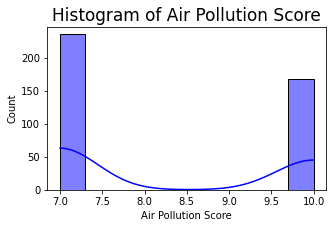

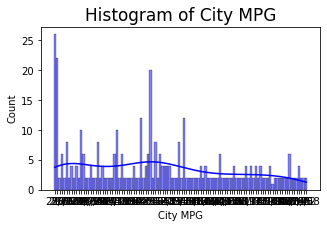

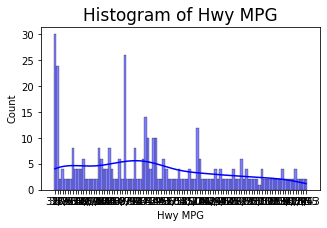

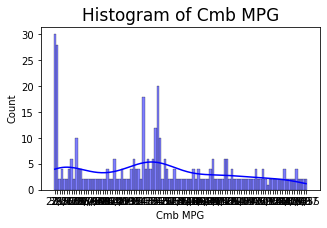

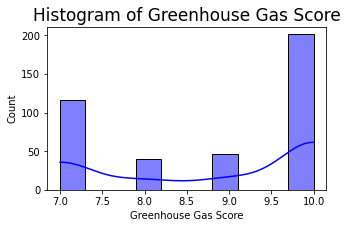

In [12]:
#Draw histogram of 5 variables we are working with

plt.figure(figsize=(5,3))
sns.histplot(df['Air Pollution Score'], kde = True, color = 'blue')
plt.title('Histogram of Air Pollution Score', fontsize=17)

plt.figure(figsize=(5,3))
sns.histplot(df['City MPG'], kde = True, color = 'blue')
plt.title('Histogram of City MPG', fontsize=17)

plt.figure(figsize=(5,3))
sns.histplot(df['Hwy MPG'], kde = True, color = 'blue')
plt.title('Histogram of Hwy MPG', fontsize=17)

plt.figure(figsize=(5,3))
sns.histplot(df['Cmb MPG'], kde = True, color = 'blue')
plt.title('Histogram of Cmb MPG', fontsize=17)

plt.figure(figsize=(5,3))
sns.histplot(df['Greenhouse Gas Score'], kde = True, color = 'blue')
plt.title('Histogram of Greenhouse Gas Score', fontsize=17)


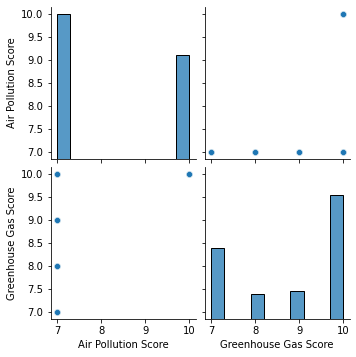

In [13]:
import seaborn as sns
sns.pairplot(df[['Air Pollution Score', 'City MPG', 'Hwy MPG', 'Cmb MPG', 'Greenhouse Gas Score']])

Text(0.5, 1.0, 'Air Pollution Score vs.Greenhouse Gas Score')

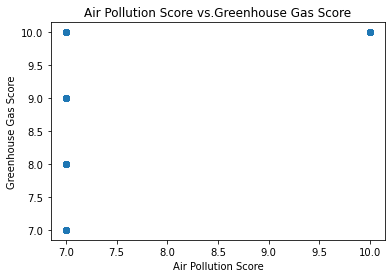

In [14]:
#Scaltter plot between Air Pollution Score vs.Greenhouse Gas Score

plt.scatter(df['Air Pollution Score'], df['Greenhouse Gas Score'])
plt.xlabel('Air Pollution Score')
plt.ylabel('Greenhouse Gas Score')
plt.title('Air Pollution Score vs.Greenhouse Gas Score')

# Step #4: Find duplicates

In [15]:
# Read the excel sheet into orders command 
orders=pd.read_excel('SmartWay Vehicle List for MY 2022.xlsx', "all_alpha_22", 0)
orders.head()

,Model,Displ,Cyl,Trans,Drive,Fuel,Cert Region,Stnd,Stnd Description,Underhood ID,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay
0,AUDI A3,2.0,4.0,AMS-7,2WD,Gasoline,CA,L3SULEV30,California LEV-III SULEV30,NVGAV02.0A3B,small car,7,29,38,32,7,Yes
1,AUDI A3,2.0,4.0,AMS-7,2WD,Gasoline,FA,T3B30,Federal Tier 3 Bin 30,NVGAV02.0A3B,small car,7,29,38,32,7,Yes
2,AUDI A3,2.0,4.0,AMS-7,4WD,Gasoline,CA,L3SULEV30,California LEV-III SULEV30,NVGAV02.0A3B,small car,7,28,36,31,7,Yes
3,AUDI A3,2.0,4.0,AMS-7,4WD,Gasoline,FA,T3B30,Federal Tier 3 Bin 30,NVGAV02.0A3B,small car,7,28,36,31,7,Yes
4,AUDI A7 TFSI e quattro,2.0,4.0,AMS-7,4WD,Gasoline/Electricity,CA,L3SULEV30,California LEV-III SULEV30,NVGAJ02.0A3P,midsize car,7,25/66,31/75,27/70,10,Yes


In [16]:
# Represent the duplicate rowes 
orders.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
398    False
399    False
400    False
401    False
402    False
Length: 403, dtype: bool

In [17]:
# Count how many rows are actually duplicated 
orders.duplicated().sum()

0

Seems no duplicated rows in the above dataset because of no True value and 0 True value of sum() command

In [18]:
# Identify the duplicated in 'Model' column
orders['Model'].duplicated().sum()

235

In [19]:
#Disply hte first duplicataed 5 rows 
orders[orders['Model'].duplicated()].head(5)

,Model,Displ,Cyl,Trans,Drive,Fuel,Cert Region,Stnd,Stnd Description,Underhood ID,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay
1,AUDI A3,2.0,4.0,AMS-7,2WD,Gasoline,FA,T3B30,Federal Tier 3 Bin 30,NVGAV02.0A3B,small car,7,29,38,32,7,Yes
2,AUDI A3,2.0,4.0,AMS-7,4WD,Gasoline,CA,L3SULEV30,California LEV-III SULEV30,NVGAV02.0A3B,small car,7,28,36,31,7,Yes
3,AUDI A3,2.0,4.0,AMS-7,4WD,Gasoline,FA,T3B30,Federal Tier 3 Bin 30,NVGAV02.0A3B,small car,7,28,36,31,7,Yes
5,AUDI A7 TFSI e quattro,2.0,4.0,AMS-7,4WD,Gasoline/Electricity,FA,T3B30,Federal Tier 3 Bin 30,NVGAJ02.0A3P,midsize car,7,25/66,31/75,27/70,10,Yes
7,AUDI Q4 e-tron Sportback quattro,NaN,NaN,Auto-1,4WD,Electricity,CA,ZEV,California ZEV,NVGAT00.0NZ5,standard SUV,10,100,89,95,10,Elite


# Step #5: Fix casing or inconsistent values

In [20]:
df=pd.read_excel('SmartWay Vehicle List for MY 2022.xlsx', "all_alpha_22")
df

,Model,Displ,Cyl,Trans,Drive,Fuel,Cert Region,Stnd,Stnd Description,Underhood ID,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay
0,AUDI A3,2.0,4.0,AMS-7,2WD,Gasoline,CA,L3SULEV30,California LEV-III SULEV30,NVGAV02.0A3B,small car,7,29,38,32,7,Yes
1,AUDI A3,2.0,4.0,AMS-7,2WD,Gasoline,FA,T3B30,Federal Tier 3 Bin 30,NVGAV02.0A3B,small car,7,29,38,32,7,Yes
2,AUDI A3,2.0,4.0,AMS-7,4WD,Gasoline,CA,L3SULEV30,California LEV-III SULEV30,NVGAV02.0A3B,small car,7,28,36,31,7,Yes
3,AUDI A3,2.0,4.0,AMS-7,4WD,Gasoline,FA,T3B30,Federal Tier 3 Bin 30,NVGAV02.0A3B,small car,7,28,36,31,7,Yes
4,AUDI A7 TFSI e quattro,2.0,4.0,AMS-7,4WD,Gasoline/Electricity,CA,L3SULEV30,California LEV-III SULEV30,NVGAJ02.0A3P,midsize car,7,25/66,31/75,27/70,10,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398,VOLVO XC40 Recharge twin,NaN,NaN,Auto-1,4WD,Electricity,CA,ZEV,California ZEV,NVVXV00.0Z0A,small SUV,10,92,79,85,10,Elite
399,VOLVO XC60 T8 Recharge,2.0,4.0,SemiAuto-8,4WD,Gasoline/Electricity,CA,L3SULEV30,California LEV-III SULEV30,NVVXJ02.0P3S,small SUV,7,24/59,27/55,25/57,8,Yes
400,VOLVO XC60 T8 Recharge,2.0,4.0,SemiAuto-8,4WD,Gasoline/Electricity,FA,T3B30,Federal Tier 3 Bin 30,NVVXJ02.0P3S,small SUV,7,24/59,27/55,25/57,8,Yes
401,VOLVO XC90 T8 Recharge,2.0,4.0,SemiAuto-8,4WD,Gasoline/Electricity,CA,L3SULEV30,California LEV-III SULEV30,NVVXJ02.0P3S,standard SUV,7,26/58,28/53,27/55,9,Yes


In [21]:
# Drop rows has missing any values 
df.dropna(axis='index', how='any')

,Model,Displ,Cyl,Trans,Drive,Fuel,Cert Region,Stnd,Stnd Description,Underhood ID,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay
0,AUDI A3,2.0,4.0,AMS-7,2WD,Gasoline,CA,L3SULEV30,California LEV-III SULEV30,NVGAV02.0A3B,small car,7,29,38,32,7,Yes
1,AUDI A3,2.0,4.0,AMS-7,2WD,Gasoline,FA,T3B30,Federal Tier 3 Bin 30,NVGAV02.0A3B,small car,7,29,38,32,7,Yes
2,AUDI A3,2.0,4.0,AMS-7,4WD,Gasoline,CA,L3SULEV30,California LEV-III SULEV30,NVGAV02.0A3B,small car,7,28,36,31,7,Yes
3,AUDI A3,2.0,4.0,AMS-7,4WD,Gasoline,FA,T3B30,Federal Tier 3 Bin 30,NVGAV02.0A3B,small car,7,28,36,31,7,Yes
4,AUDI A7 TFSI e quattro,2.0,4.0,AMS-7,4WD,Gasoline/Electricity,CA,L3SULEV30,California LEV-III SULEV30,NVGAJ02.0A3P,midsize car,7,25/66,31/75,27/70,10,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,VOLVO V60 T8 Recharge,2.0,4.0,SemiAuto-8,4WD,Gasoline/Electricity,FA,T3B30,Federal Tier 3 Bin 30,NVVXJ02.0P3S,station wagon,7,28/70,33/68,30/69,10,Yes
399,VOLVO XC60 T8 Recharge,2.0,4.0,SemiAuto-8,4WD,Gasoline/Electricity,CA,L3SULEV30,California LEV-III SULEV30,NVVXJ02.0P3S,small SUV,7,24/59,27/55,25/57,8,Yes
400,VOLVO XC60 T8 Recharge,2.0,4.0,SemiAuto-8,4WD,Gasoline/Electricity,FA,T3B30,Federal Tier 3 Bin 30,NVVXJ02.0P3S,small SUV,7,24/59,27/55,25/57,8,Yes
401,VOLVO XC90 T8 Recharge,2.0,4.0,SemiAuto-8,4WD,Gasoline/Electricity,CA,L3SULEV30,California LEV-III SULEV30,NVVXJ02.0P3S,standard SUV,7,26/58,28/53,27/55,9,Yes


In [22]:
# Drop columns has missing any values 
df.dropna(axis='columns', how='any')

,Model,Trans,Drive,Fuel,Cert Region,Stnd,Stnd Description,Underhood ID,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay
0,AUDI A3,AMS-7,2WD,Gasoline,CA,L3SULEV30,California LEV-III SULEV30,NVGAV02.0A3B,small car,7,29,38,32,7,Yes
1,AUDI A3,AMS-7,2WD,Gasoline,FA,T3B30,Federal Tier 3 Bin 30,NVGAV02.0A3B,small car,7,29,38,32,7,Yes
2,AUDI A3,AMS-7,4WD,Gasoline,CA,L3SULEV30,California LEV-III SULEV30,NVGAV02.0A3B,small car,7,28,36,31,7,Yes
3,AUDI A3,AMS-7,4WD,Gasoline,FA,T3B30,Federal Tier 3 Bin 30,NVGAV02.0A3B,small car,7,28,36,31,7,Yes
4,AUDI A7 TFSI e quattro,AMS-7,4WD,Gasoline/Electricity,CA,L3SULEV30,California LEV-III SULEV30,NVGAJ02.0A3P,midsize car,7,25/66,31/75,27/70,10,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398,VOLVO XC40 Recharge twin,Auto-1,4WD,Electricity,CA,ZEV,California ZEV,NVVXV00.0Z0A,small SUV,10,92,79,85,10,Elite
399,VOLVO XC60 T8 Recharge,SemiAuto-8,4WD,Gasoline/Electricity,CA,L3SULEV30,California LEV-III SULEV30,NVVXJ02.0P3S,small SUV,7,24/59,27/55,25/57,8,Yes
400,VOLVO XC60 T8 Recharge,SemiAuto-8,4WD,Gasoline/Electricity,FA,T3B30,Federal Tier 3 Bin 30,NVVXJ02.0P3S,small SUV,7,24/59,27/55,25/57,8,Yes
401,VOLVO XC90 T8 Recharge,SemiAuto-8,4WD,Gasoline/Electricity,CA,L3SULEV30,California LEV-III SULEV30,NVVXJ02.0P3S,standard SUV,7,26/58,28/53,27/55,9,Yes


# Step #6: Conduct Fuzzy Matching

In [23]:
# Install fuzzywuzzy
! pip install fuzzywuzzy

In [24]:
# Install Levenshtein
! pip install Levenshtein

In [25]:
from fuzzywuzzy import process

In [33]:
#Read the columns names from 'df.columns'
df.columns

Index(['Model', 'Displ', 'Cyl', 'Trans', 'Drive', 'Fuel', 'Cert Region',
       'Stnd', 'Stnd Description', 'Underhood ID', 'Veh Class',
       'Air Pollution Score', 'City MPG', 'Hwy MPG', 'Cmb MPG',
       'Greenhouse Gas Score', 'SmartWay'],
      dtype='object')

In [34]:
#Read the columns names from 'df1.columns'
df1.columns

Index(['Modle', 'Displ', 'Cyl', 'Trans', 'Drive', 'Fule', 'Cert Region',
       'Stnd ', 'Stnd Description', 'Underhood ID', 'Veh Class',
       'Air pollution Score', 'City MPG', 'Hwy MPG', 'Cmb MPG',
       'Greenhouse Gas Score', 'SmartWay'],
      dtype='object')

In [35]:
# Compare the df.columns and df1.columns to get fuzzy string 
print(df.columns == df1.columns)

[False  True  True  True  True False  True False  True  True  True False
  True  True  True  True  True]


I got 4 False, which means I have 4 misspelled 